Cosmology (compact) SS2020 

# Exercise sheet 1.2

## 2. The distribution of matter within haloes

In [1]:
#%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.colors as clr

In [2]:
# Read file, find the data, read the header
fname = "simulation"
f = h5py.File("/u/yali/cosmology/"+fname+".hdf5", 'r')
print(f["Snapshots"]["99"]["PartType1"].keys())

header = dict(f["Header"].attrs.items())
h = header["HubbleParam"]
mass_dm = header["MassTable"][1] * 1e10 / h
lbox = header["BoxSize"]/h

snapshot = 99
header_snapshot = dict(f["Snapshots/{}/Header".format(snapshot)].attrs.items())
z_snapshot = round(header_snapshot["Redshift"], 1)
a = header_snapshot["Time"]

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>


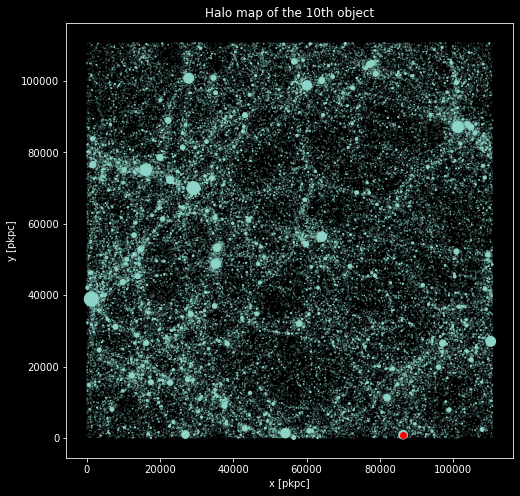

The radius of this halo is:  1143.6564  pkpc
The mass of this halo is: 1.60E+14  M_sun


In [6]:
groupsdf = pd.DataFrame()
groupsdf["GroupPosX"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,0] * a/h
groupsdf["GroupPosY"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,1] * a/h
groupsdf["GroupPosZ"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,2] * a/h
groupsdf["GroupMass"] = f["Groups/{}/Group/GroupMass".format(snapshot)][:] * 1e10/h
plt.figure(figsize=(8, 8))
plt.scatter(groupsdf["GroupPosX"] ,groupsdf["GroupPosY"] , s=groupsdf["GroupMass"] /np.max(groupsdf["GroupMass"])*200)
plt.scatter(groupsdf["GroupPosX"][10] ,groupsdf["GroupPosY"][10], color="red")
plt.xlabel("x [pkpc]")
plt.ylabel("y [pkpc]")
plt.title("Halo map of the 10th object")
plt.show()
groupsdf["Group_R_Crit200"] = f["Groups/{}/Group/Group_R_Crit200".format(snapshot)][:] * a/h
print("The radius of this halo is: ", groupsdf["Group_R_Crit200"][10], " pkpc")
groupsdf["Group_M_Crit200"] = f["Groups/{}/Group/Group_M_Crit200".format(snapshot)][:] * 1e10/h
print("The mass of this halo is: %.2E"%(groupsdf["Group_M_Crit200"][10]), " M_sun")

In [4]:
dmdf = pd.DataFrame()
dmdf["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshot)][:,0] * a/h
dmdf["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshot)][:,1] * a/h
dmdf["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshot)][:,2] * a/h
dmdf["r_10th"] = np.sqrt((dmdf["DMPosX"]-groupsdf["GroupPosX"][10])**2+(dmdf["DMPosY"]-groupsdf["GroupPosY"][10])**2+(dmdf["DMPosZ"]-groupsdf["GroupPosZ"][10])**2)

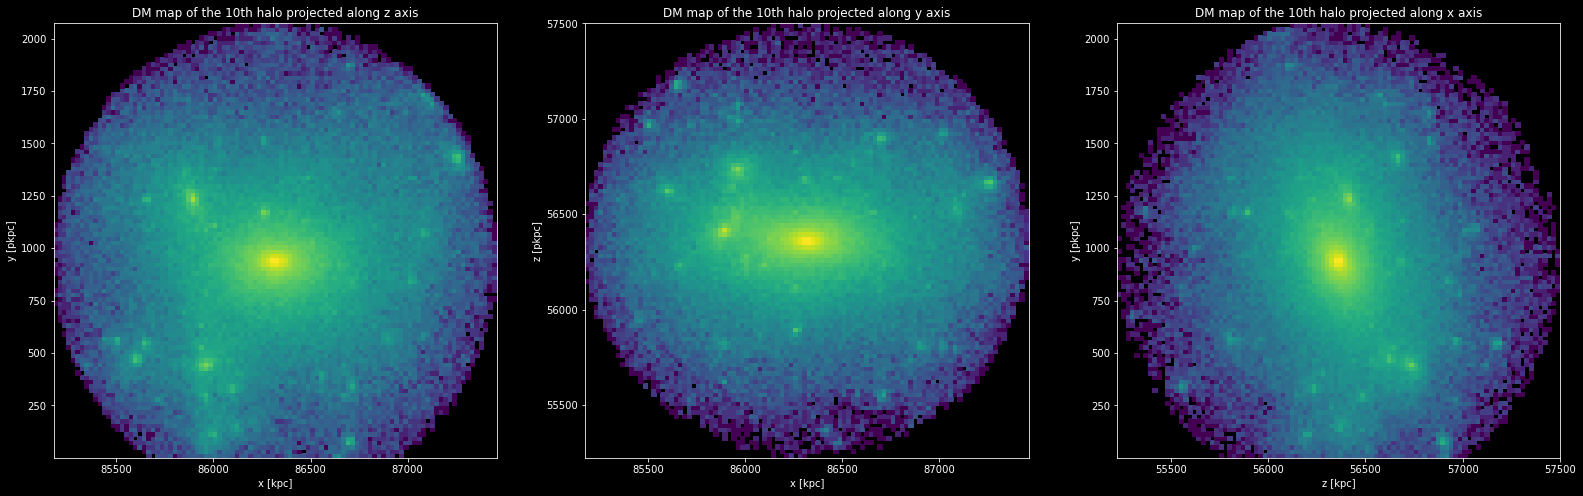

In [11]:
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(27, 8))
halo = 10
axs[0].hist2d(dmdf["DMPosX"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosY"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100, norm = clr.LogNorm(), weights = mass_dm*np.ones(len(dmdf["DMPosX"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ])))
axs[0].set(xlabel='x [kpc]', ylabel='y [pkpc]', title = "DM map of the 10th halo projected along z axis")
#axs[0].colorbar()
axs[1].hist2d(dmdf["DMPosX"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosZ"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100, norm = clr.LogNorm())
axs[1].set(xlabel='x [kpc]', ylabel='z [pkpc]', title = "DM map of the 10th halo projected along y axis")
axs[2].hist2d(dmdf["DMPosZ"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosY"][dmdf["r_10th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100,  norm = clr.LogNorm())
axs[2].set(xlabel='z [kpc]', ylabel='y [pkpc]', title = "DM map of the 10th halo projected along x axis")

#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
print("The average density of the halo is %.2E M_sun/pkpc^2"%(groupsdf["Group_M_Crit200"][10]/(np.pi*groupsdf["Group_R_Crit200"][10]**2)))
print("Based on the image the density field looks like it has a central concentrated profile")

Comparing different projections of the same halo, we observe that the halo is flattened in the z direction. 


### Now we plot some dark-matter density maps of haloes of very different masses.

In [14]:
print("First: the 200th halo")
print("The radius of this halo is: ", groupsdf["Group_R_Crit200"][200], " pkpc")
print("The mass of this halo is: %.2E"%(groupsdf["Group_M_Crit200"][200]), " M_sun")
dmdf["r_200th"] = np.sqrt((dmdf["DMPosX"]-groupsdf["GroupPosX"][200])**2+(dmdf["DMPosY"]-groupsdf["GroupPosY"][200])**2+(dmdf["DMPosZ"]-groupsdf["GroupPosZ"][200])**2)

First: the 200th halo
The radius of this halo is:  477.93835  pkpc
The mass of this halo is: 1.16E+13  M_sun


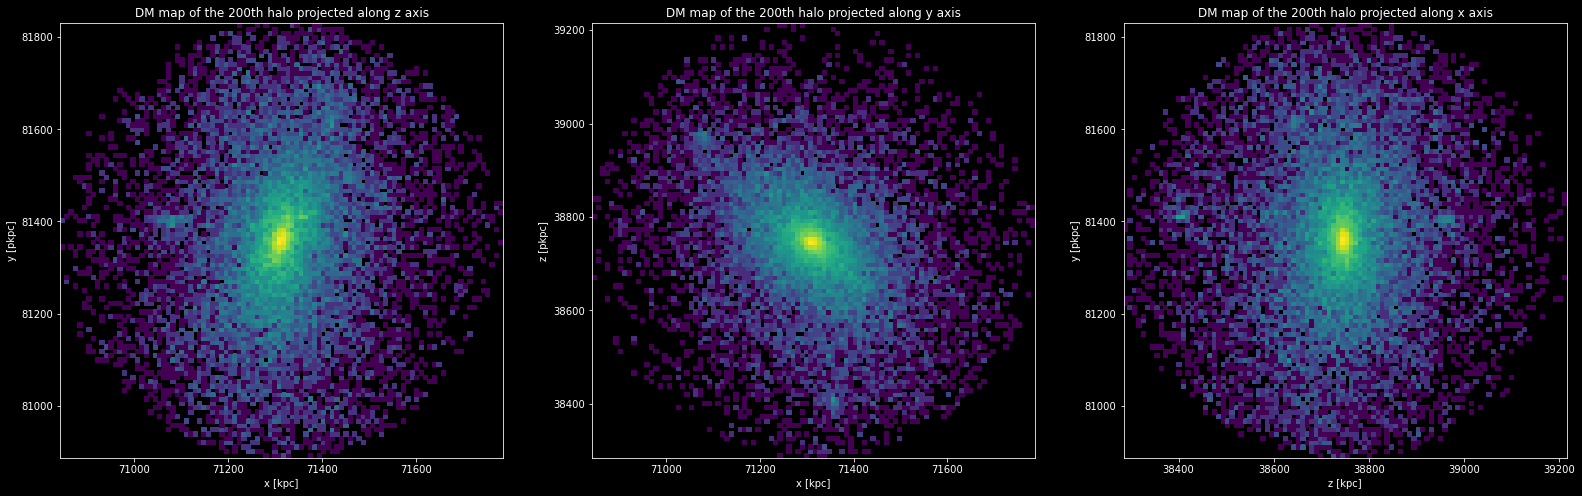

In [15]:
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(27, 8))
halo = 200
axs[0].hist2d(dmdf["DMPosX"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosY"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100, norm = clr.LogNorm(), weights = mass_dm*np.ones(len(dmdf["DMPosX"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ])))
axs[0].set(xlabel='x [kpc]', ylabel='y [pkpc]', title = "DM map of the 200th halo projected along z axis")
#axs[0].colorbar()
axs[1].hist2d(dmdf["DMPosX"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosZ"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100, norm = clr.LogNorm())
axs[1].set(xlabel='x [kpc]', ylabel='z [pkpc]', title = "DM map of the 200th halo projected along y axis")
axs[2].hist2d(dmdf["DMPosZ"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosY"][dmdf["r_200th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100,  norm = clr.LogNorm())
axs[2].set(xlabel='z [kpc]', ylabel='y [pkpc]', title = "DM map of the 200th halo projected along x axis")

#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
print("Second: the 500th halo")
print("The radius of this halo is: ", groupsdf["Group_R_Crit200"][500], " pkpc")
print("The mass of this halo is: %.2E"%(groupsdf["Group_M_Crit200"][500]), " M_sun")
dmdf["r_500th"] = np.sqrt((dmdf["DMPosX"]-groupsdf["GroupPosX"][500])**2+(dmdf["DMPosY"]-groupsdf["GroupPosY"][500])**2+(dmdf["DMPosZ"]-groupsdf["GroupPosZ"][500])**2)

Second: the 500th halo
The radius of this halo is:  344.5522  pkpc
The mass of this halo is: 4.36E+12  M_sun


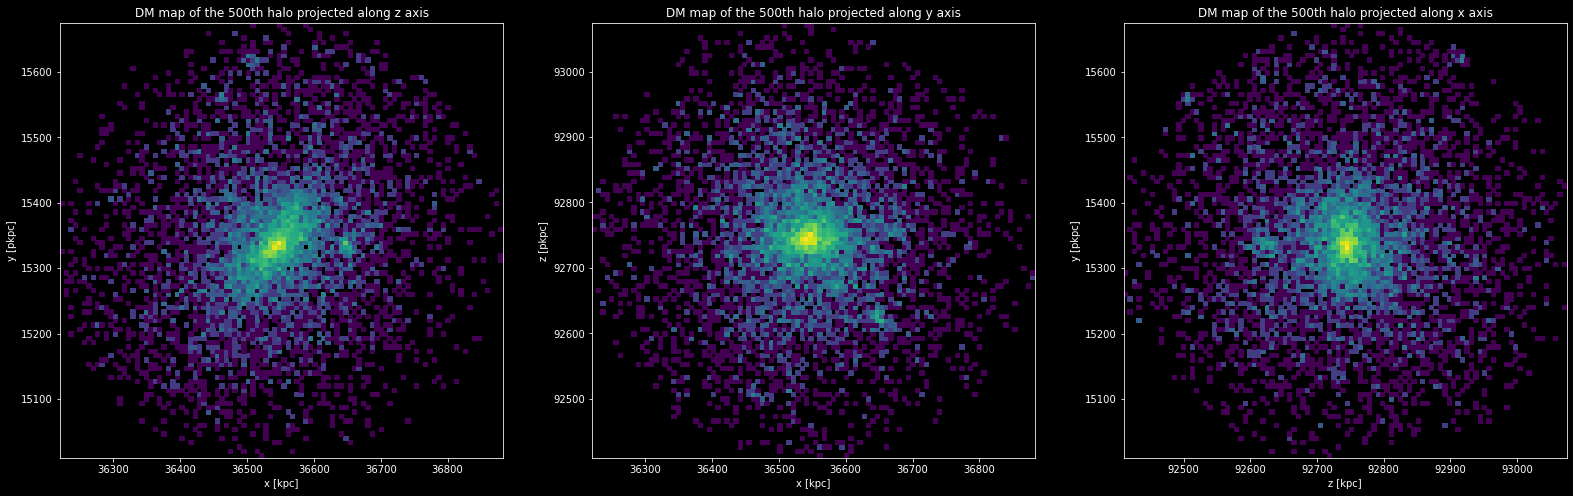

In [17]:
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(27, 8))
halo = 500
axs[0].hist2d(dmdf["DMPosX"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosY"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100, norm = clr.LogNorm(), weights = mass_dm*np.ones(len(dmdf["DMPosX"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ])))
axs[0].set(xlabel='x [kpc]', ylabel='y [pkpc]', title = "DM map of the 500th halo projected along z axis")
#axs[0].colorbar()
axs[1].hist2d(dmdf["DMPosX"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosZ"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100, norm = clr.LogNorm())
axs[1].set(xlabel='x [kpc]', ylabel='z [pkpc]', title = "DM map of the 500th halo projected along y axis")
axs[2].hist2d(dmdf["DMPosZ"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ] ,dmdf["DMPosY"][dmdf["r_500th"] <= groupsdf["Group_R_Crit200"][halo] ], bins = 100,  norm = clr.LogNorm())
axs[2].set(xlabel='z [kpc]', ylabel='y [pkpc]', title = "DM map of the 500th halo projected along x axis")

#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Since the first halo we chose (10th halo) represents the halo with high mass, We plotted further 2 haloes with 1 and 2 magnitude of order less mass than the 10th halo, i.e. the 200th halo and the 500th halo. We see they have a much smaller halo radius. 